<a href="https://colab.research.google.com/github/RamakantaParida/AI-ML-project/blob/main/bank_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('Data/Customer_and_bank details_p1.csv')
df2 = pd.read_csv('Data/Customer_campaign_details_p1.csv')
df3 = pd.read_csv('Data/Customer_social_economic_data_p1.csv')
df4 = pd.read_csv('Data/Customer_Response_data_p1.csv')

In [ ]:
print('df1 shape : ', df1.shape)
print('df2 shape : ', df2.shape)
print('df3 shape : ', df3.shape)
print('df4 shape : ', df4.shape)

df1 shape :  (37084, 11)
df2 shape :  (37084, 9)
df3 shape :  (37084, 6)
df4 shape :  (37084, 2)


<h3>we have join these rows according to the guidelines

In [ ]:
df4.head()

,Customer_id,y
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


In [ ]:
df2.drop(['Customer_id'], axis=1, inplace=True)
df3.drop(['Customer_id'], axis=1, inplace=True)
df4.drop(['Customer_id'], axis=1, inplace=True)

In [ ]:
df2.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,307,1,999,0,nonexistent
1,telephone,may,mon,198,1,999,0,nonexistent
2,telephone,may,mon,139,1,999,0,nonexistent
3,telephone,may,mon,217,1,999,0,nonexistent
4,telephone,may,mon,380,1,999,0,nonexistent


In [ ]:
df = pd.concat([df1,df2,df3,df4], axis=1)
df.shape

(37084, 25)

In [ ]:
df.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,services,married,high.school,no,no,yes,3,S1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,59,admin.,married,professional.course,no,no,no,4,S2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,41,blue-collar,married,unknown,unknown,no,no,3,S3,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,24,technician,single,professional.course,no,yes,no,3,S3,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<h3>now our required dataframe is ready to use

<h1>DATA UNDERSTANDING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code     37084 non-null  object 
 9   State_Code      37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [ ]:
df.describe()

,Customer_id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.082669,93.576076,-40.505183,3.621668,5167.058664
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,1.568997,0.578493,4.622045,1.733972,72.196605
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
categorical_cols = ['Region_Code','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

for cat in categorical_cols:
    print(f"-------{cat}--------")
    print(df[cat].value_counts())

-------Region_Code--------
4     11884
2     10558
1      8590
3      5992
Na       60
Name: Region_Code, dtype: int64
-------job--------
admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: job, dtype: int64
-------marital--------
married     22479
single      10407
divorced     4126
unknown        72
Name: marital, dtype: int64
-------education--------
university.degree      10971
high.school             8542
basic.9y                5421
professional.course     4746
basic.4y                3765
basic.6y                2074
unknown                 1549
illiterate                16
Name: education, dtype: int64
-------default--------
no         29382
unknown     7700
yes            2
Name: default, dtype: int64
-------housing--------
yes        19433
no         16769
unkno

<h3>in most of the columns there is an unknown category

<h1>DATA CLEANING

In [ ]:
df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h3>there is no null value

<h1>DATA VISUALIZATION & EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

<Axes: xlabel='duration', ylabel='job'>

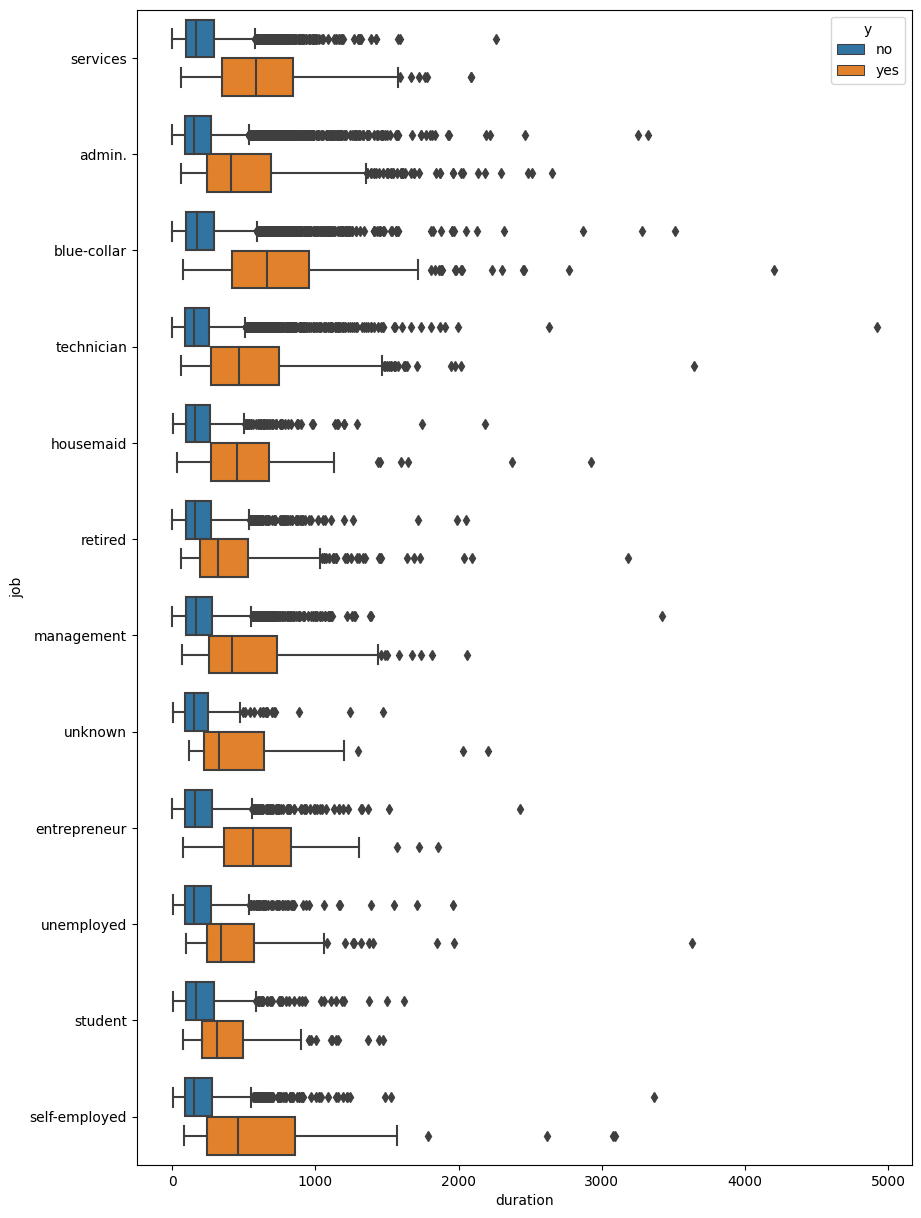

In [ ]:
plt.figure(figsize=(10,15))
sn.boxplot(data=df, x='duration', y='job', hue = 'y')

<h3>- people who deposit have more duration of calls
<h3>- where bluecollar, self-employed have more duration of calls in case of deposited category

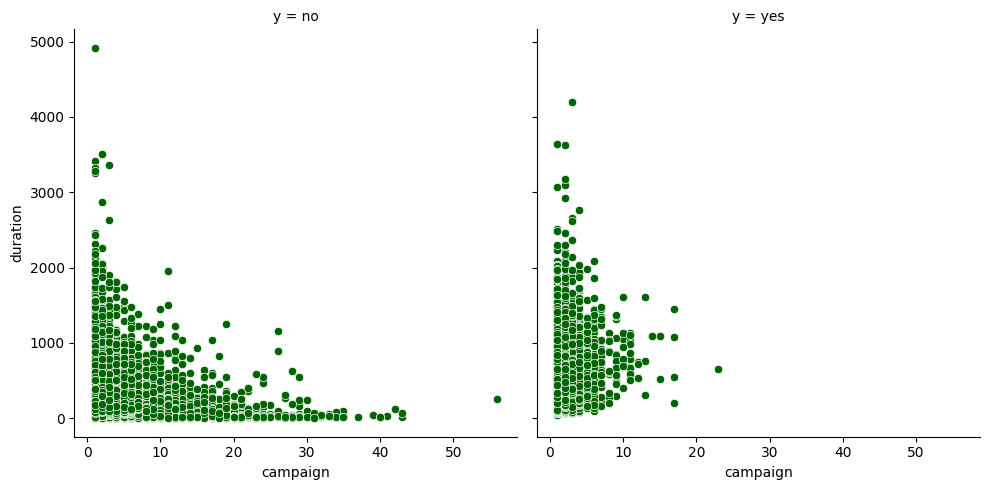

In [ ]:
sn.relplot(data=df, x='campaign',y='duration', col='y', color='darkgreen')

<Axes: xlabel='campaign', ylabel='month'>

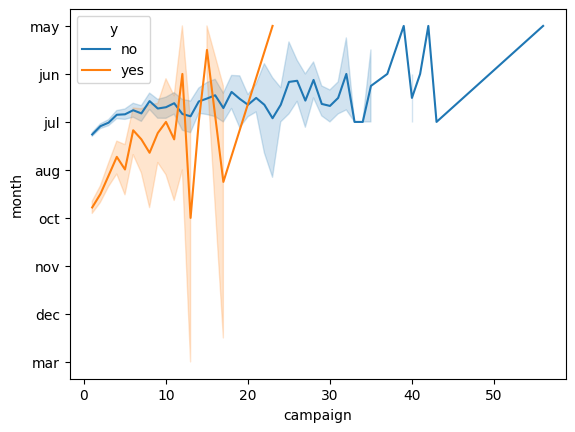

In [ ]:
sn.lineplot(data=df , x='campaign', y="month", hue="y")

<h3>For the customers who have deposited , no of campaign done is quiet less < 25 campaigns

In [ ]:
df[df.y == 'yes'].duration.describe()

count    4208.000000
mean      553.544439
std       398.822898
min        37.000000
25%       255.750000
50%       452.000000
75%       741.000000
max      4199.000000
Name: duration, dtype: float64

<h3>Outcomes vs some categorical columns

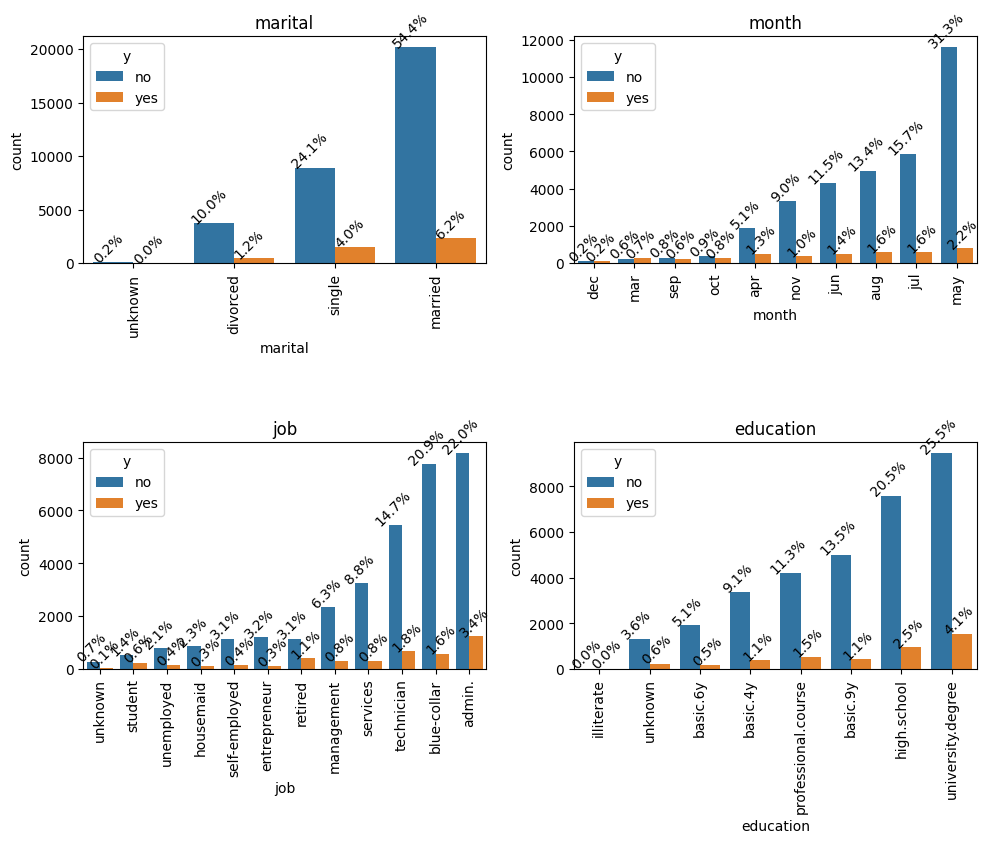

In [ ]:
plt.figure(figsize=(10,15))
categorical_columns=['marital','month','job','education']


for i, variable in enumerate(categorical_columns):
                     plt.subplot(4,2,i+1)
                     order = df[variable].value_counts(ascending=True).index
                     ax = sn.countplot(data = df, x=variable, hue='y' , order=order)
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height() +1
                           plt.annotate(percentage, (x, y),ha='center', rotation=45)
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

- <b>married</b> customers have done most deposit i.e. 54%
- 31% of customers have done most deposit whom campaign was done in month of <b>May</b>
- 25% of customers deposites are done by <b>university-degree students</b>
- Among job <b>personel admin</b> and <b>blue_collar</b> category have done approx 20% deposits

<BarContainer object of 37084 artists>

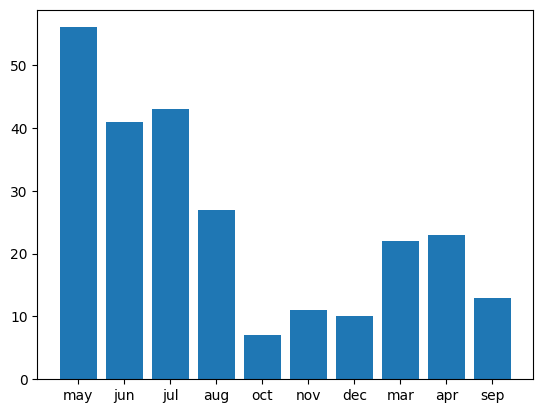

In [ ]:
plt.bar(df.month, df.campaign)

In [ ]:
df.euribor3m

0        4.857
1        4.857
2        4.857
3        4.857
4        4.857
         ...  
37079    1.028
37080    1.028
37081    1.028
37082    1.028
37083    1.028
Name: euribor3m, Length: 37084, dtype: float64

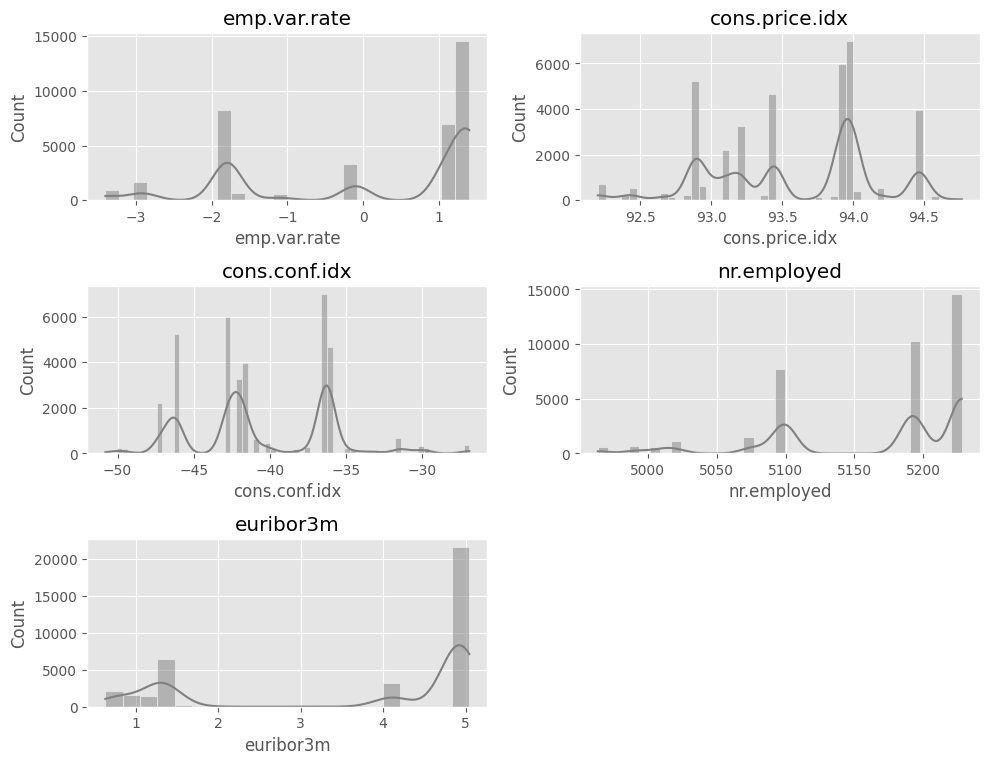

In [ ]:
plt.style.use('ggplot')

columns = ['emp.var.rate','cons.price.idx','cons.conf.idx','nr.employed','euribor3m']
plt.figure(figsize=(10,25))

for i, variable in enumerate(columns):
    plt.subplot(10,2,i+1)
    sn.histplot(df[variable],kde=True,color='grey')
    plt.tight_layout()
    plt.title(variable)

<Axes: xlabel='cons.price.idx', ylabel='marital'>

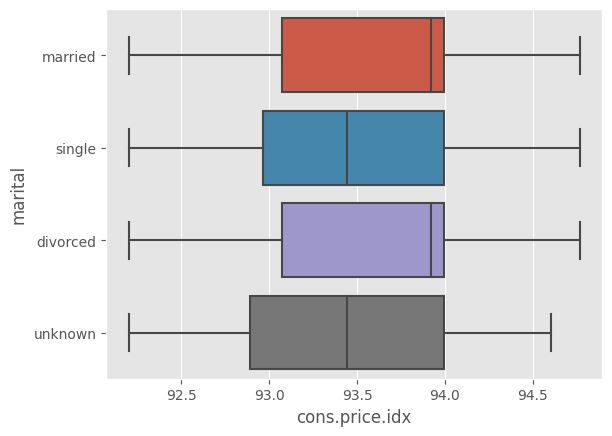

In [ ]:
sn.boxplot( y=df["marital"], x=df["cons.price.idx"] )

<h3>Final Insights</h3>

- <b>married</b> customers have high deposites followed by <b>singles</b>
- During <b>may</b> month most more deposits
- <b>University-degree</b> students have most deposits followed by <b>highschool</b>
- <b>admin</b> have most deposits followed by <b>blue collars</b>

<h1>Correlation matrix

<ipython-input-25-5a06ee54c2fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True)


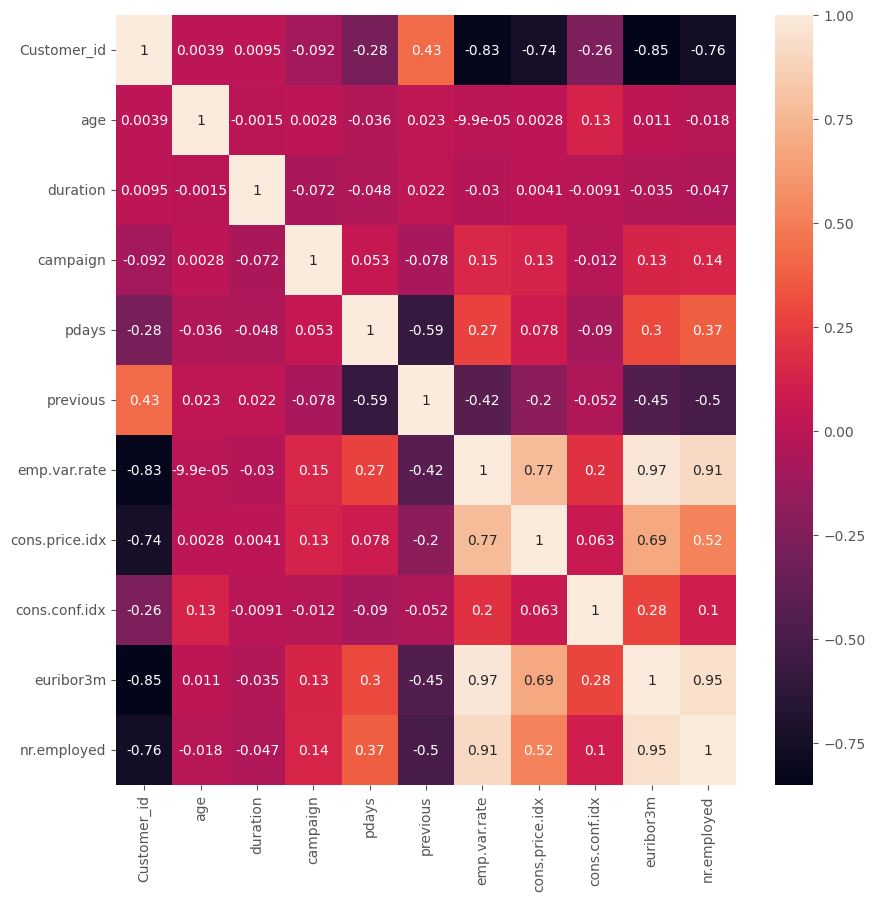

In [ ]:
_,ax=plt.subplots(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
target_column = 'campaign'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the correlation with the target column
correlation_with_target_column = correlation_matrix[target_column].drop(target_column)

# Find the top correlated columns
top_correlated_columns = correlation_with_target_column.abs().nlargest(7)

print("Top correlated columns with", target_column, ":")
print(top_correlated_columns)


Top correlated columns with campaign :
emp.var.rate      0.150390
nr.employed       0.143609
euribor3m         0.134640
cons.price.idx    0.126598
Customer_id       0.092179
previous          0.078300
duration          0.072291
Name: campaign, dtype: float64


<ipython-input-26-3e8a8fcd6ebe>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


- There are correlations among the indicators.
- The number of employees rate is highly correlated with the employee variation rate. This suggests that when the number of employees in a company changes significantly (i.e., high employee variation rate), it tends to be correlated with changes in the overall number of employees.
- The consumer price index is highly correlated with bank interest rates. Specifically, when the consumer price index is higher (indicating higher inflation), the bank interest rates tend to be higher as well. This relationship is often observed because central banks might raise interest rates to control inflation.
- Employee variation rate also correlates with bank interest rates, which means that there is some relationship between changes in the number of employees and changes in bank interest rates. This correlation suggests that economic factors influencing employment levels may also impact interest rates.

In [ ]:
df6 = df.copy()

<h1>FEATURE ENGINEERING

<h3> Detecting Outliers using Boxplot

Text(0.5, 1.0, 'No of employees')

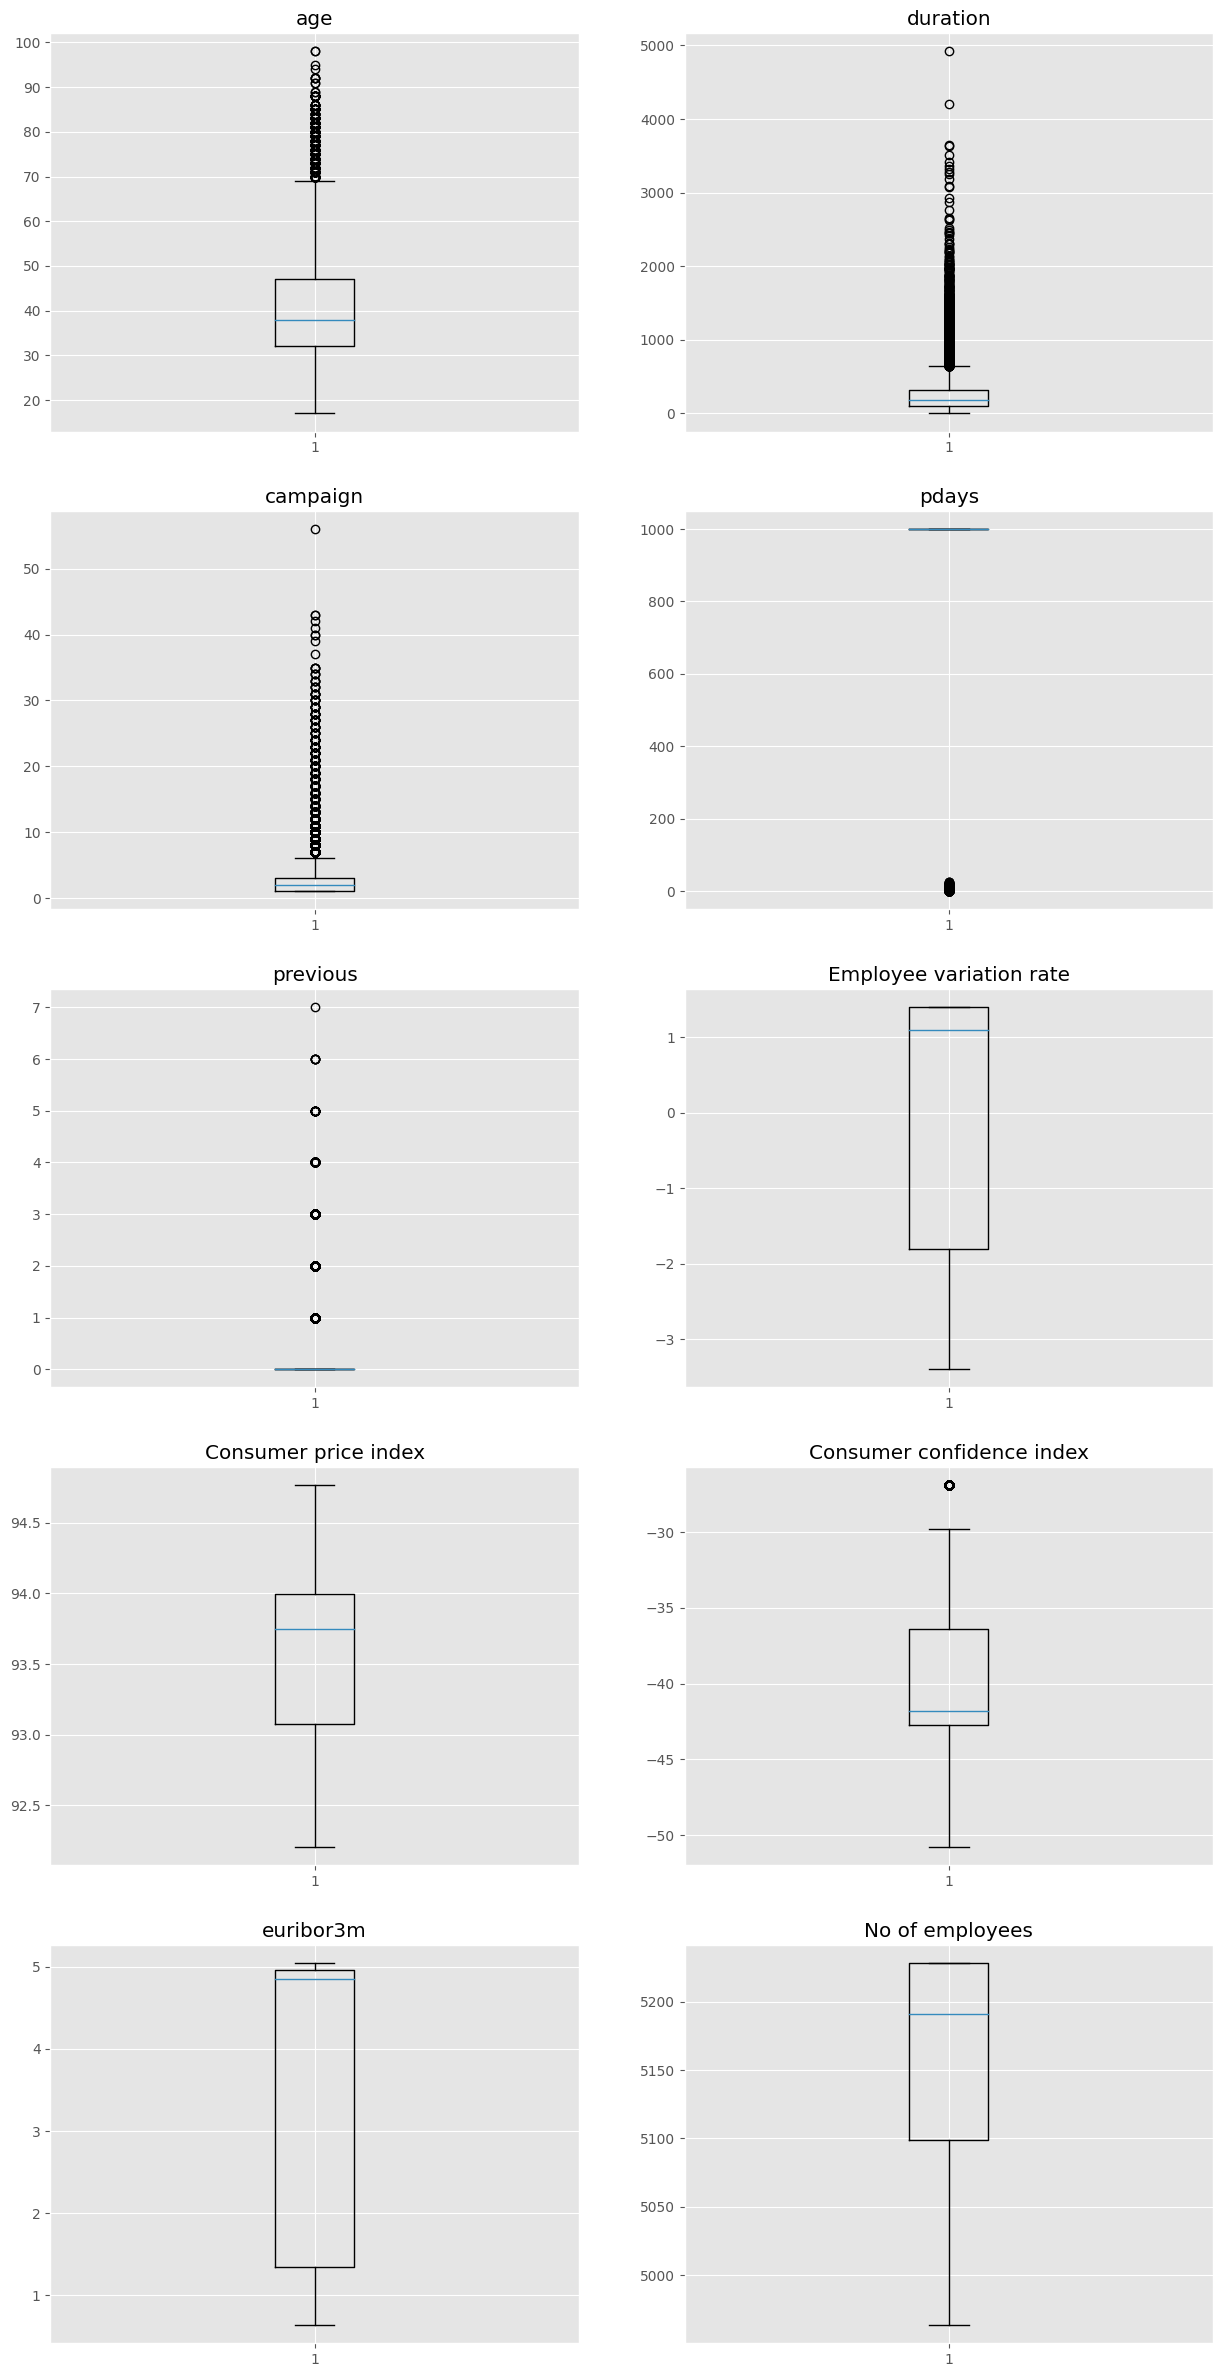

In [ ]:
plt.figure(figsize = (15, 30))

ax=plt.subplot(521)
plt.boxplot(df6['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(df6['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(df6['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(df6['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(df6['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(df6['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(df6['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(df6['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(df6['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(df6['nr.employed'])
ax.set_title('No of employees')

- only <b>age</b>,<b>campaign</b> and <b>duration</b> has outliers

removing outliers using IQR(Inter Qunatile Range) technique

In [ ]:
df6.job.value_counts()

admin.           9420
blue-collar      8314
technician       6096
services         3547
management       2637
retired          1541
entrepreneur     1309
self-employed    1276
housemaid         946
unemployed        925
student           767
unknown           306
Name: job, dtype: int64

In [ ]:
df6.job = df6.job.apply(lambda x : "admin" if x=='admin.' else x)

In [ ]:
outlier_cols = ['age','campaign','duration']

for oc in outlier_cols:
    Q1 = df6[oc].quantile(0.25)
    Q3 = df6[oc].quantile(0.75)
    IQR = Q3-Q1

    updated_cols = (df6[oc] >= Q1 - 1.5*IQR) & (df6[oc] <= Q3 + 1.5*IQR)

    df6 = df6.loc[updated_cols]

In [ ]:
df6.education.value_counts()

university.degree      9501
high.school            7412
basic.9y               4748
professional.course    4123
basic.4y               3083
basic.6y               1791
unknown                1308
illiterate               12
Name: education, dtype: int64

In [ ]:
df6.Region_Code = df6.Region_Code.apply(lambda x : 5 if x=='Na' else x)
df6.Region_Code.value_counts()

<ipython-input-33-ab7a9f8cb798>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.Region_Code = df6.Region_Code.apply(lambda x : 5 if x=='Na' else x)


4    10222
2     9142
1     7395
3     5168
5       51
Name: Region_Code, dtype: int64

In [ ]:
outlier_edu = ['basic.9y','basic.6y','basic.4y']

for oe in outlier_edu:
    df6.loc[df6.education == oe, 'education'] = "mid_school"

df6.education.value_counts()

mid_school             9622
university.degree      9501
high.school            7412
professional.course    4123
unknown                1308
illiterate               12
Name: education, dtype: int64

<h3>ENCODING categorical columns

In [ ]:
df6.loc[df6['pdays'] == 999, 'pdays'] = 0

In [ ]:
df6.to_csv('preprocessed_data.csv')

In [ ]:
label = {'yes':1, 'no':0, 'unknown':-1}
df6.housing = df6.housing.map(label)
df6.default = df6.default.map(label)
df6.loan = df6.loan.map(label)
df6.y = df6.y.map(label)

In [ ]:
# df6.head(40)

In [ ]:
month_map = {'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df6['month']= df6['month'].map(month_map)

day_map = {'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df6['day_of_week']= df6['day_of_week'].map(day_map)

In [ ]:
label = {'failure':0, 'success':1, 'nonexistent':-1}
df6['poutcome'] = df6.poutcome.map(label)

In [ ]:
df6['contact'] = df6.contact.map({'cellular':1,'telephone':0})

In [ ]:
df6.groupby(['marital'])['y'].mean().sort_values()

marital
divorced    0.063915
married     0.069475
single      0.114582
unknown     0.142857
Name: y, dtype: float64

In [ ]:
labels_1 = df6.groupby(['marital'])['y'].mean().sort_values().index
labels ={k:i for i,k in enumerate(labels_1,0)}

df6['marital'] = df6['marital'].map(labels)

In [ ]:
df_job = df6['job'].value_counts().to_dict()
df_ed = df6['education'].value_counts().to_dict()

df_job = dict(sorted(df_job.items(), key=lambda item: item[1]))
df_ed = dict(sorted(df_ed.items(), key=lambda item: item[1]))

job_label = {k:i for i,k in enumerate(df_job.keys())}
ed_label = {k:i for i,k in enumerate(df_ed.keys())}

df6['job'] = df6['job'].map(job_label)
df6['education'] = df6['education'].map(ed_label)

In [ ]:
df6.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,56,8,1,3,0,0,1,3,S1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
1,2,45,8,1,5,-1,0,0,3,S1,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
2,3,59,11,1,2,0,0,0,4,S2,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
3,4,41,10,1,1,-1,0,0,3,S3,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0
4,5,24,9,2,2,0,1,0,3,S3,...,1,0,0,-1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

for cat in categorical_cols:
    print(f"-------{cat}--------")
    print(df6[cat].value_counts())

-------job--------
11    8212
10    7259
9     5324
8     3072
7     2303
6     1149
5     1094
4     1016
3      810
2      798
1      682
0      259
Name: job, dtype: int64
-------marital--------
1    19374
2     9059
0     3489
3       56
Name: marital, dtype: int64
-------education--------
5    9622
4    9501
3    7412
2    4123
1    1308
0      12
Name: education, dtype: int64
-------default--------
 0    25394
-1     6582
 1        2
Name: default, dtype: int64
-------housing--------
 1    16800
 0    14418
-1      760
Name: housing, dtype: int64
-------loan--------
 0    26360
 1     4858
-1      760
Name: loan, dtype: int64
-------contact--------
1    20326
0    11652
Name: contact, dtype: int64
-------month--------
5     10973
7      5270
8      4782
6      4050
11     3347
4      2090
10      518
3       414
9       408
12      126
Name: month, dtype: int64
-------day_of_week--------
2    6751
5    6596
3    6326
4    6317
6    5988
Name: day_of_week, dtype: int64
-------pout

<h3>Scaling numerical values

In [ ]:
df7 = df6.copy()

In [ ]:
numerical_cols = [
 'age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df7[numerical_cols])

StandardScaler()

In [ ]:
scaled_data = pd.concat([df7[categorical_cols].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df7[numerical_cols]), columns=numerical_cols)],
                    axis=1)
scaled_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,8,1,3,0,0,1,0,5,2,-1,...,1.693101,0.710185,-0.812584,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.720576,0.339846
1,8,1,5,-1,0,0,0,5,2,-1,...,0.556580,-0.064579,-0.812584,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.720576,0.339846
2,11,1,2,0,0,0,0,5,2,-1,...,2.003061,-0.483946,-0.812584,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.720576,0.339846
3,10,1,1,-1,0,0,0,5,2,-1,...,0.143300,0.070472,-0.812584,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.720576,0.339846
4,9,2,2,0,1,0,0,5,2,-1,...,-1.613141,1.229063,-0.812584,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.720576,0.339846


In [ ]:
scaled_data.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,31978.000000,...,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04,3.197800e+04
mean,8.526831,1.177685,3.687035,-0.205766,0.501595,0.128151,0.635624,6.601226,3.960723,-0.828038,...,7.110316e-18,-6.754800e-17,-1.493166e-16,1.422063e-17,-2.844126e-17,1.137651e-16,-4.408396e-15,-3.128539e-16,-1.137651e-16,3.071656e-15
std,2.689865,0.606498,1.150928,0.404422,0.545472,0.399081,0.481262,2.062816,1.412827,0.455252,...,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,3.000000,2.000000,-1.000000,...,-2.336381e+00,-1.471948e+00,-8.125839e-01,-1.603284e-01,-3.540840e-01,-2.214614e+00,-2.368364e+00,-2.225429e+00,-1.719407e+00,-2.845182e+00
25%,7.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,-1.000000,...,-7.865804e-01,-7.540474e-01,-8.125839e-01,-1.603284e-01,-3.540840e-01,-1.192246e+00,-8.527576e-01,-4.707989e-01,-1.309180e+00,-9.473312e-01
50%,9.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,4.000000,-1.000000,...,-1.666600e-01,-2.636007e-01,-3.363945e-02,-1.603284e-01,-3.540840e-01,6.607962e-01,-2.128736e-01,-2.758399e-01,7.205764e-01,3.398459e-01
75%,11.000000,2.000000,5.000000,0.000000,1.000000,0.000000,1.000000,8.000000,5.000000,-1.000000,...,7.632204e-01,5.253789e-01,7.453050e-01,-1.603284e-01,-3.540840e-01,8.524902e-01,7.408830e-01,8.939138e-01,7.806660e-01,8.594789e-01
max,11.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,1.000000,...,3.036262e+00,3.133987e+00,3.082138e+00,2.006889e+01,1.380966e+01,8.524902e-01,2.081345e+00,2.951814e+00,8.291998e-01,8.594789e-01


In [ ]:
scaled_data.columns
#feature used for modeling

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y', 'age', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
X = scaled_data.drop(['y'],axis=1)
y = scaled_data.y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (25582, 20)
Input Test: (6396, 20)
Output Training: (25582,)
Output Test: (6396,)


In [ ]:
X_train.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
891,2,1,5,0,0,0,0,5,4,-1,-0.786580,-0.690076,-0.033639,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.719999,0.339846
2834,11,2,3,0,0,1,0,5,5,-1,-1.509821,0.738617,0.745305,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.722310,0.339846
28791,11,1,4,0,0,0,1,6,2,0,-0.063340,1.790589,-0.812584,-0.160328,1.669308,-1.895124,-1.046977,-0.059219,-1.383714,-1.268075
2051,4,1,3,0,1,0,0,5,3,-1,1.899741,-0.732724,-0.033639,-0.160328,-0.354084,0.660796,0.740883,0.893914,0.719999,0.339846
20160,8,2,4,0,1,0,0,11,4,-1,-0.786580,-1.102336,-0.033639,-0.160328,-0.354084,-0.105980,-0.635995,-0.319164,0.294749,0.407076


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9310506566604128

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier()
knn_cv = KNeighborsClassifier()
svc_cv = SVC()
nb_cv = BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Test Accuracy: 0.8703966918642262
Decision Tree Test Accuracy: 0.6533082629255109
KNN Test Accuracy: 0.8089206226991651
SVC Test Accuracy: 0.8619222543492248
Naive Bayes Test Accuracy: 0.7440705433858313


<h1>Taking Logistic Regression and Doing hyper parameter tuning we can get the best fit model

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'none'],
            'max_iter': [200,500,1000]}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: S

LogisticRegression(C=0.0001, max_iter=500, penalty='none', random_state=0)
The mean accuracy of the model is: 0.9312070043777361


In [ ]:
logreg = LogisticRegression(C=0.0001, max_iter=200, penalty='none', random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Accuracy of logistic regression classifier on test set: 0.93


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      5883
           1       0.62      0.37      0.46       513

    accuracy                           0.93      6396
   macro avg       0.78      0.67      0.71      6396
weighted avg       0.92      0.93      0.92      6396



In [ ]:
import joblib


# Save the model as a pickle in a file
joblib.dump(logreg, 'final_model.pkl')

['final_model.pkl']